# Part 1: Choose Your Product & Design Funnel

# AliExpress Funnel Analysis

## 1. **Visit Website/App**
- **What exactly defines this step?**  
  The user opens the AliExpress website or mobile app - this marks the entry point into the user journey.

- **Why might users drop off here?**  
  - App is slow or crashes  
  - Poor first impression (ads, popups)  
  - Unclear value proposition or confusing homepage  
  - User just opened by mistake or curiosity

- **What business value does completing this step create?**  
  - Begins the user session  
  - Counts as traffic (used in marketing KPIs)  
  - Enables retargeting via cookies/push notifications

---

## 2. **View Product Page**	
- **What exactly defines this step?**  
  The user clicks on a product and lands on its detail page.

- **Why might users drop off here?**  
  - Bad reviews or low rating  
  - Poor product images or description  
  - Long shipping time or high shipping cost

- **What business value does completing this step create?**  
  - High-intent signal  
  - Builds user trust through reviews and photos  
  - Valuable data for sellers

---

## 3. **Add to Cart**
- **What exactly defines this step?**  
  User clicks "Add to Cart" or "Buy Now" on the product page.

- **Why might users drop off here?**  
  - Price is too high  
  - Needs to register or log in  
  - Still comparing options

- **What business value does completing this step create?**  
  - Strong signal of purchase intent  
  - Enables reminder emails and retargeting  
  - Helps forecast demand

---

## 4. **Complete Purchase**
- **What exactly defines this step?**  
  User completes the checkout process and pays.

- **Why might users drop off here?**  
  - Complicated checkout  
  - Payment failure or delay  
  - Unexpected shipping costs

- **What business value does completing this step create?**  
  - Generates revenue  
  - Captures user and transaction data  
  - Triggers logistics & seller revenue


# Part 2: Research & Estimate Your Funnel

In [22]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [23]:
# Define the funnel data
data = {
    "Funnel Step": [
        "Visit Website/App",
        "View Product Page",
        "Add to Cart",
        "Complete Purchase",
    ],
    "Users at Step": [100000, 40000, 15000, 9000],
}

# Create the DataFrame
funnel_df = pd.DataFrame(data)

# Calculate step-by-step conversion
funnel_df["Step Conversion (%)"] = funnel_df["Users at Step"] / funnel_df["Users at Step"].shift(1) * 100
funnel_df["Step Conversion (%)"] = funnel_df["Step Conversion (%)"].round(2)

funnel_df["Step Conversion (%)"] = funnel_df["Step Conversion (%)"].apply(lambda x: f"{x:.1f}%" if pd.notnull(x) else "")

# Display the table
funnel_df

,Funnel Step,Users at Step,Step Conversion (%)
0,Visit Website/App,100000,
1,View Product Page,40000,40.0%
2,Add to Cart,15000,37.5%
3,Complete Purchase,9000,60.0%


### Calculate overall conversion from first to last

In [24]:
# Calculate overall conversion from first to last
initial = funnel_df["Users at Step"].iloc[0]
final = funnel_df["Users at Step"].iloc[-1]
overall_conversion = final / initial * 100
overall_conversion = round(overall_conversion, 2)

print(f"Overall funnel conversion: {overall_conversion}%")

Overall funnel conversion: 9.0%


### Add Drop Off to the table

In [25]:
funnel_df["Drop-off (%)"] = 100 - (funnel_df["Users at Step"] / funnel_df["Users at Step"].shift(1) * 100)
funnel_df["Drop-off (%)"] = funnel_df["Drop-off (%)"].round(2)
funnel_df.loc[0, "Drop-off (%)"] = None
funnel_df["Drop-off (%)"] = funnel_df["Drop-off (%)"].apply(lambda x: f"{x:.1f}%" if pd.notnull(x) else "")

# Display the table
funnel_df

,Funnel Step,Users at Step,Step Conversion (%),Drop-off (%)
0,Visit Website/App,100000,,
1,View Product Page,40000,40.0%,60.0%
2,Add to Cart,15000,37.5%,62.5%
3,Complete Purchase,9000,60.0%,40.0%


### Biggest Drop Off

In [26]:
# Find the step with the biggest drop
max_drop_index = funnel_df["Drop-off (%)"].idxmax()
worst_step = funnel_df.loc[max_drop_index, "Funnel Step"]
worst_drop = funnel_df.loc[max_drop_index, "Drop-off (%)"]

print(f"Biggest drop-off is between step {max_drop_index} → '{worst_step}' ({worst_drop})")

Biggest drop-off is between step 2 → 'Add to Cart' (62.5%)


### Visualizations

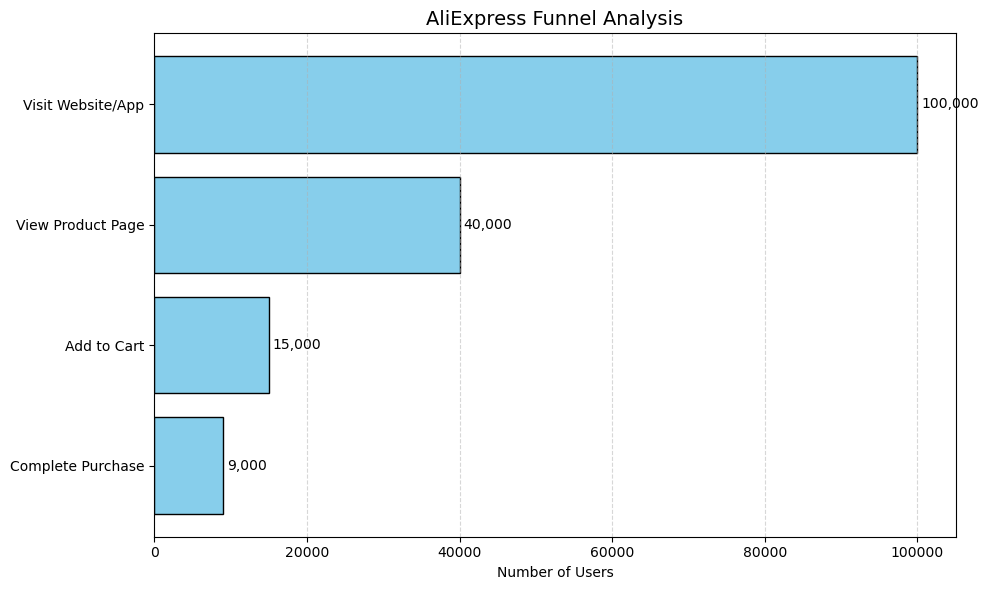

In [27]:
# Data
steps = funnel_df["Funnel Step"]
users = funnel_df["Users at Step"]

# Reverse the order so that the funnel is "top to bottom"
steps = steps[::-1]
users = users[::-1]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(steps, users, color='skyblue', edgecolor='black')

# Add value labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 500, bar.get_y() + bar.get_height() / 2,
             f"{int(width):,}", va='center', fontsize=10)

# Titles and labels
plt.title("AliExpress Funnel Analysis", fontsize=14)
plt.xlabel("Number of Users")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


In [28]:
# Funnel data 
stages = [
    "Visit Website/App",
    "View Product Page",
    "Add to Cart",
    "Complete Purchase",
]

values = [100000, 40000, 15000, 9000]

# Create the funnel chart
fig = go.Figure(go.Funnel(
    y=stages,
    x=values,
    textinfo="value+percent previous",  # Show actual values + percentage from first step
    marker={"color": "royalblue"}
))

fig.update_layout(title='AliExpress Funnel Analysis (Interactive)')
fig.show()
